# ML in Python- Unsupervised Learning Algorithms- PCA Data

### 1) Importing Libraries and Loading Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [7]:
#Create a path to where your data is stored.
path = r'C:\Users\wjzak\Dropbox\Career Foundry\Data Specialization\Module 2\01-2026- Analysis\01 Data'

In [8]:
#Read in the Regular weather data.
df = pd.read_csv(os.path.join(path, '1990s_PCA.csv'))
df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,Pleasant_Weather
0,-10.957492,2.442347,2.226863,-0.046812,2.406228,No
1,-11.439991,2.277300,1.554125,0.651248,2.323725,No
2,-11.509257,1.922020,1.396949,0.876290,1.697859,No
3,-10.497637,4.457652,3.290627,-0.676940,0.210355,No
4,-10.198109,2.604600,4.413382,1.924977,-0.212214,No


### 2) Dendrogram Tree

In [9]:
### 3) Generate Features for Dendrogram Linkage
# Extract only numeric features (excluding id, DATE, MONTH)
exclude = ['id', 'DATE', 'MONTH']
features = df[[col for col in df.columns if col not in exclude and pd.api.types.is_numeric_dtype(df[col])]]

# Display the feature matrix
print(f"Feature matrix shape: {features.shape}")
print(f"Features: {features.columns.tolist()}")
print(features.head())

Feature matrix shape: (3652, 5)
Features: ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']
        PCA1      PCA2      PCA3      PCA4      PCA5
0 -10.957492  2.442347  2.226863 -0.046812  2.406228
1 -11.439991  2.277300  1.554125  0.651248  2.323725
2 -11.509257  1.922020  1.396949  0.876290  1.697859
3 -10.497637  4.457652  3.290627 -0.676940  0.210355
4 -10.198109  2.604600  4.413382  1.924977 -0.212214


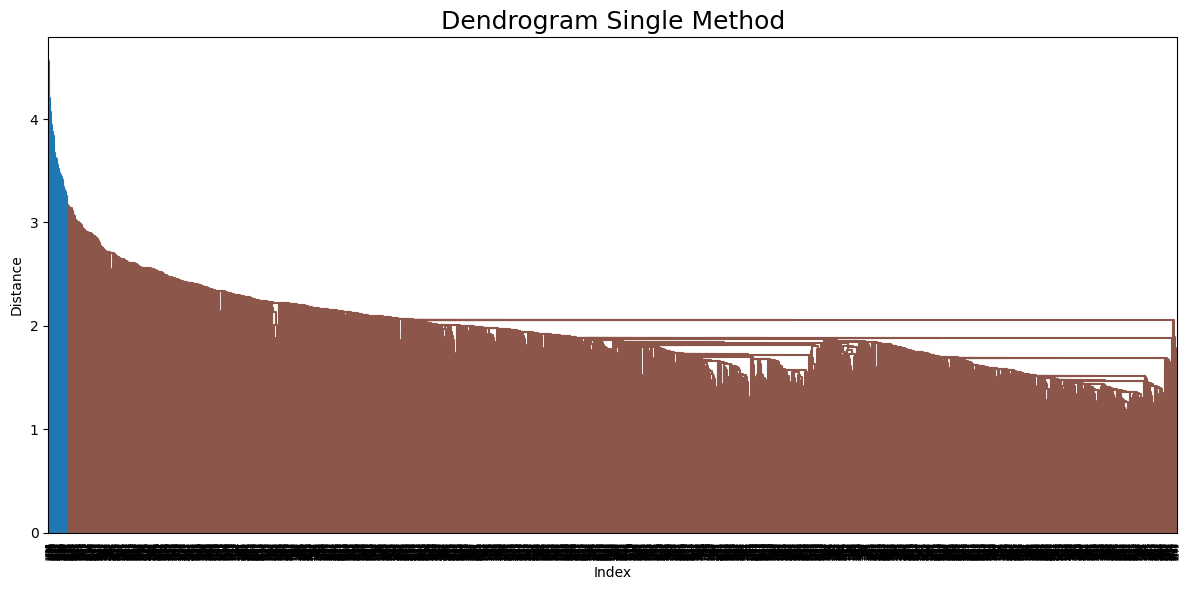

In [10]:
# Choose Method for Linkage
distance_single = linkage(features, method='single')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.title('Dendrogram Single Method',fontsize=18)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

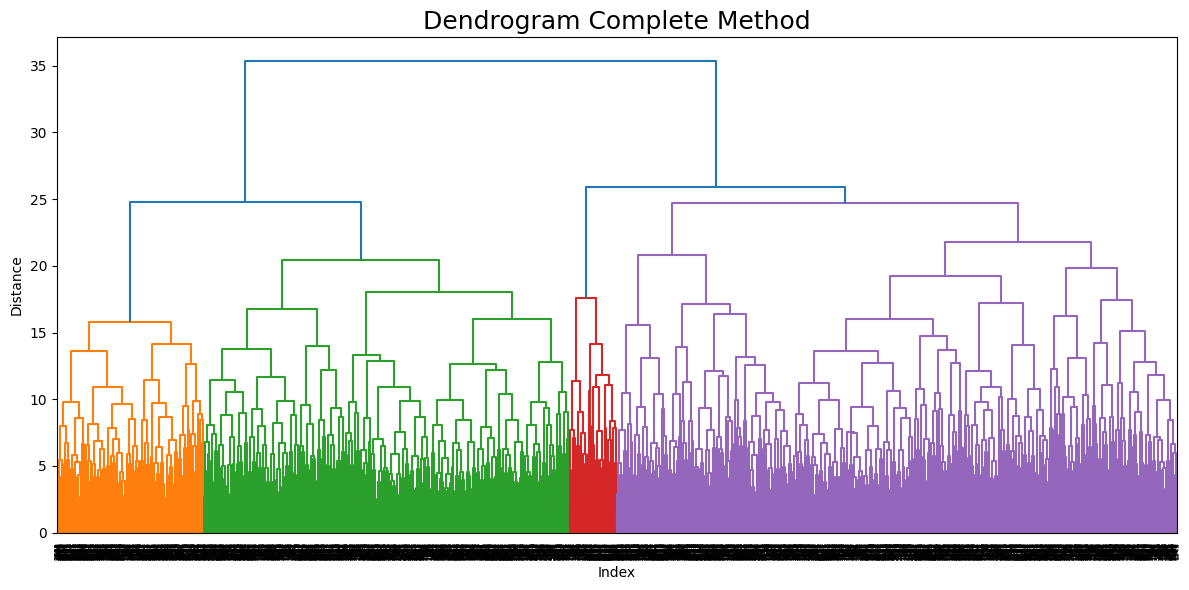

In [11]:
# Choose Method for Linkage - Complete Method
distance_complete = linkage(features, method='complete')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.title('Dendrogram Complete Method',fontsize=18)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

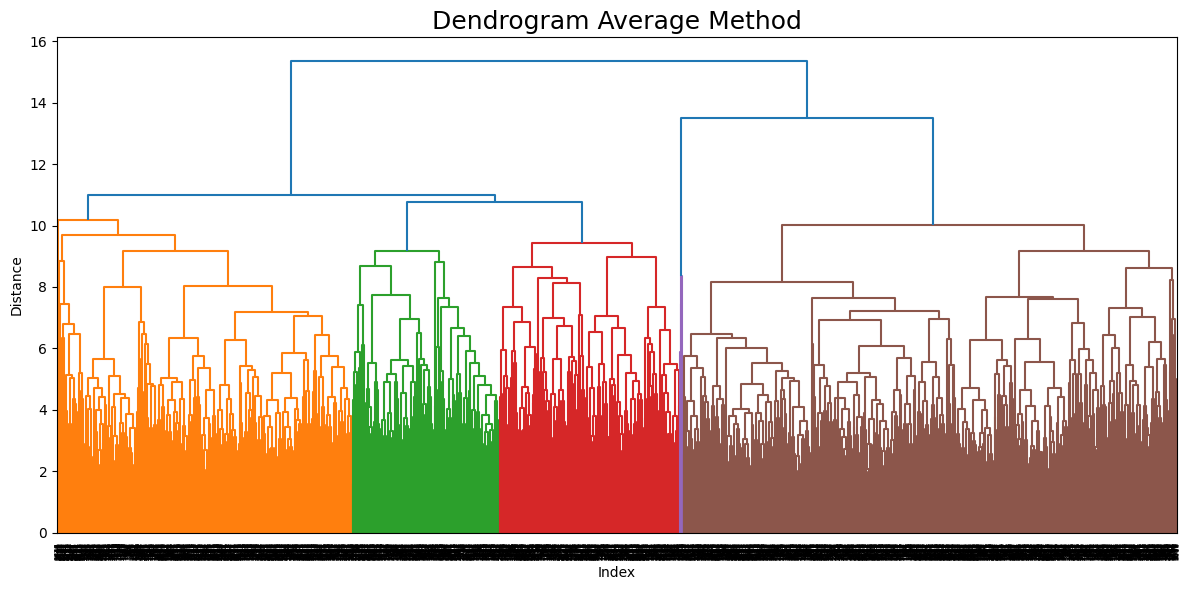

In [12]:
# Choose Method for Linkage - Average Method
distance_average = linkage(features, method='average')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.title('Dendrogram Average Method',fontsize=18)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

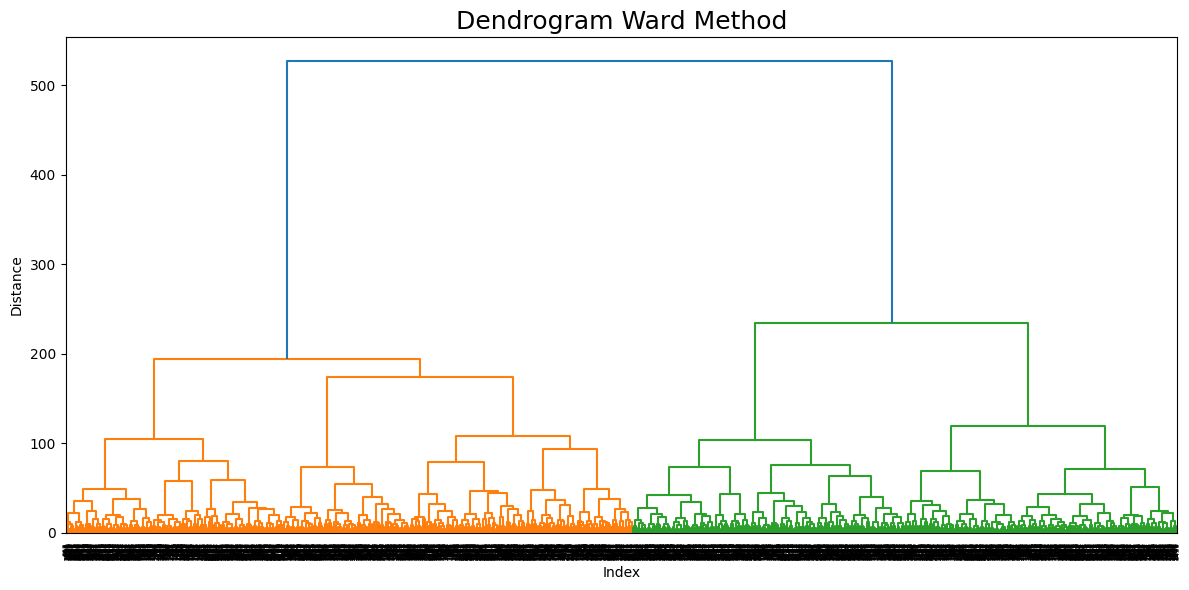

In [13]:
# Choose Method for Linkage - Ward Method
distance_ward = linkage(features, method='ward')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.title('Dendrogram Ward Method',fontsize=18)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

### 3) Comparing Clusters

In [20]:
#KMeans Clustering with 5 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['PCA1','PCA2','PCA3','PCA4','PCA5']])


In [21]:
pd.crosstab(df['cluster'], df['Pleasant_Weather'])

Pleasant_Weather,No,Yes
cluster,,
0,809,0
1,237,578
2,1009,80
3,939,0


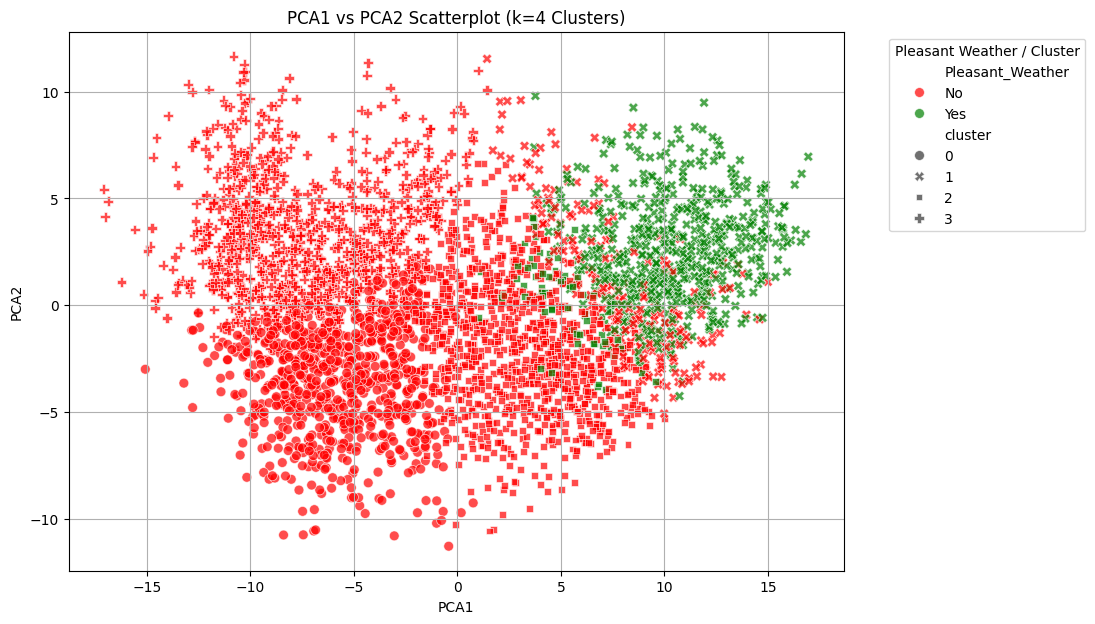

In [23]:
plt.figure(figsize=(10,7))

# Scatterplot: PCA1 vs PCA2
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Pleasant_Weather',          # Color by Pleasant/Unpleasant
    style='cluster',                 # Different marker for each cluster
    palette={'Yes':'green','No':'red'},
    data=df,
    s=50,                             # point size
    alpha=0.7
)

plt.title('PCA1 vs PCA2 Scatterplot (k=4 Clusters)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Pleasant Weather / Cluster', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True)
plt.show()